# openCV

## Install openCV

In [1]:
!pip install opencv_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 28.8 MB/s eta 0:00:0000:0100:01


## import openCV

In [1]:
import cv2

In [2]:
cv2.version.opencv_version

'4.6.0.66'

## Load image data

In [2]:
imagefile = "./image/lena.jpg"

## check shape
+ color

In [3]:
img = cv2.imread(imagefile)
print(img.shape)
# 가로, 세로, 컬러

(512, 512, 3)


+ gray

In [5]:
# gray
img2 = cv2.imread(imagefile, 0)
print(img2.shape)

(512, 512)


## show data
> ##### MAC은 실행을 멈출 수 없으며, 창을 끌 수도 없다.

In [ ]:
cv2.startWindowThread()
cv2.imshow('lena color', img)
cv2.imshow('lena gray', img2)
cv2.waitKey()
cv2.destroyAllWindows()



## Save Data

In [7]:
cv2.imwrite("./image/Lena.bmp", img)
cv2.imwrite("./image/Lena.png", img)
cv2.imwrite("./image/Lena2.png", img)
cv2.imwrite("./image/Lena2.jpg", img)

True

## color image display
> ##### MAC 유저는 창이 닫히지 않는 이슈를 이 코드로 해결 할 수 있다. 그러나 동영상은 불가능.

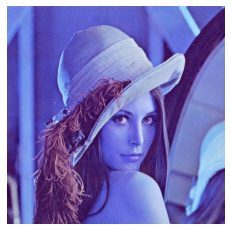

In [10]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread(imagefile)
plt.axis("off")

plt.imshow(img_bgr)
plt.show()

> ###### BGR 이슈 해결

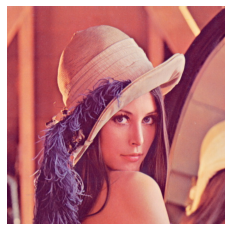

In [13]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.axis("off")

plt.imshow(img_rgb)
plt.show()

## Gray image display
> + ###### interpolation은 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 보일 수 있게 하는 방법
> + ###### imshow()에서는 16가지 보간법이 있고, nearest는 가장 고해상도인 보간법

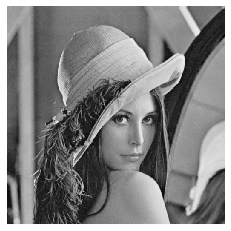

In [14]:
img_gray = cv2.imread(imagefile, cv2.IMREAD_GRAYSCALE)

plt.axis("off")
plt.imshow(img_gray, cmap="gray", interpolation='nearest')
plt.show()

## margin image save

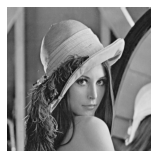

In [15]:
plt.figure(figsize=(4, 4))
plt.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5)

plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.show()

## subplot image display
> + lena, apple, boboon, orange 이미지 2행 2열 표기
>> 해법 :
        subplot(행, 열, 인덱스) 사용
        xticks(), yticks()로 눈금 제거, plt.axis("off")로도 제거 가능.
        plt.figure(figsize=(,)) plt의 사이즈 설정
           

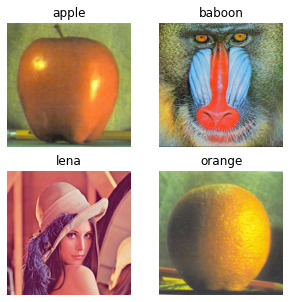

In [53]:
import numpy as np

file_apple = "./image/apple.jpg"
file_baboon = "./image/baboon.jpg"
file_orange = "./image/orange.jpg"

apple = cv2.imread(file_apple)
baboon = cv2.imread(file_baboon)
orange = cv2.imread(file_orange)

img_apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
img_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
img_orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

img_list=[img_apple, img_baboon, img_rgb, img_orange]
title_list=["apple", "baboon", "lena", "orange"]

plt.figure(figsize=(5,5))

for index, i in enumerate(img_list):
    plt.subplot(2,2,index+1)
    plt.imshow(img_list[index])
    plt.title(title_list[index])
    plt.axis('off')

plt.show()

## Video input and display
> + ###### MAC은 종료되지 않는다.
+ ###### VideoCapture(0) : CPU의 카메라
<br>

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("./image/vtest.avi")
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(25)
    
    if key == 27:
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

## 영상 입출력과 디스플레이

* ###### 영상 입력
    * cv2.imread(filename[, flags]) → retval
* ###### 영상 파일 출력
    * cv2.imwrite(filename, img[, params]) → retval
* ###### 윈도우 생성
    * cv2.namedWindow(winname[, flags])
* ###### 윈도우 표시
    * cv2.imshow(winname, mat)
* ###### 키보드 입력 대기 
    * cv2.waitKey([, delay]) → retval
* ###### 윈도우 파괴
    * cv2.destroyWindow(winname)
    * cv2.destroyAllWindow()
* ###### 비디오 획득 객체 생성
    * cv2.VideoCapture() → <VideoCatpure object>
    * cv2.VideoCapture(filename) → <VideoCatpure object>
    * cv2.VideoCapture(device) → <VideoCatpure object>
    * device = 0, 1, …
* ###### 프레임 획득
    * cv2.VideoCapture.read([image]) → retval, image
* ###### 프레임 잡기
    * cv2.VideoCapture.grab() → retval
* ###### 프레임 획득
    * cv2.VideoCapture.retrieve([image[, channel]]) → retval, image
* ###### 비디오 획득 객체 해제
    * cv2.VideoCapture.release()
* ###### 비디오 특성 얻기
    * cv2.VideoCapture.get(propid) → retval
* ###### 비디오 특성 설정
    * cv2.VideoCapture.set(propid, value) → retval
* ###### 비디오 출력 객체 생성
    * cv2.VideoWriter([filename, fourcc, fps, frameSize[,isColor]]) → <VideoWriter object>
* ###### 비디오 파일에 이미지 출력
    * cv2.VideoWriter.write(image)
* ###### 비디오 출력 객체 해제
    * cv2.VideoWriter.release()